## Análise de Série Historica IPCA

### 1 - Importação das Bibliotecas

In [132]:
from selenium import webdriver
from time import sleep
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### 2 - Acesso ao Drive para Controle e Acesso

In [2]:
driver = webdriver.Chrome()
driver.implicitly_wait(10)

### 3 - Estabelecendo Constante

In [3]:
IPCA_URL = "https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas"

### 4 - Acessando o Site em Questão com o Histórico

In [4]:
driver.get(IPCA_URL)

### 5 - Acessar HTML via Nome da Classe

In [91]:
historico_ipca = driver.find_elements_by_class_name('conteudo__interna')

<ipython-input-91-1e76371b4ffd>:1: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  historico_ipca = driver.find_elements_by_class_name('conteudo__interna')


In [103]:
Ano = driver.find_elements_by_class_name('pvtRowLabel') # Coletando os Valores do Ano Através das Classes

<ipython-input-103-fbb98fa7044b>:1: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  Ano = driver.find_elements_by_class_name('pvtRowLabel')


In [109]:
Valores = driver.find_elements_by_class_name('pvtVal') # Coletando os Valores Numéricos Através das Classes

<ipython-input-109-ea5dc8891989>:1: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  Valores = driver.find_elements_by_class_name('pvtVal')


### 6 - Loop para Inserir Dados nas Listas de Ano e Valores

In [167]:
Values_to_Work = [] 
Values = []
for l in Valores:
    Values_to_Work.append(l.text)
    
for h in Values_to_Work:
    res = h.replace("," , '.')
    Values.append(float(res))

In [168]:
Year = []
for j in Ano:
    Year.append(j.text)

### 7 - Transformar Vetores em um Dataset do Pandas

In [169]:
data = {'Year': Year , 'Values': Values}

In [170]:
indice_ipca = pd.DataFrame(data)

In [171]:
indice_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    27 non-null     object 
 1   Values  27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


In [172]:
indice_ipca

,Year,Values
0,dezembro 1995,22.41
1,dezembro 1996,9.56
2,dezembro 1997,5.22
3,dezembro 1998,1.65
4,dezembro 1999,8.94
5,dezembro 2000,5.97
6,dezembro 2001,7.67
7,dezembro 2002,12.53
8,dezembro 2003,9.30
9,dezembro 2004,7.60


### 8 - Criando um Gráfico como Bonus

<AxesSubplot:xlabel='Year', ylabel='Values'>

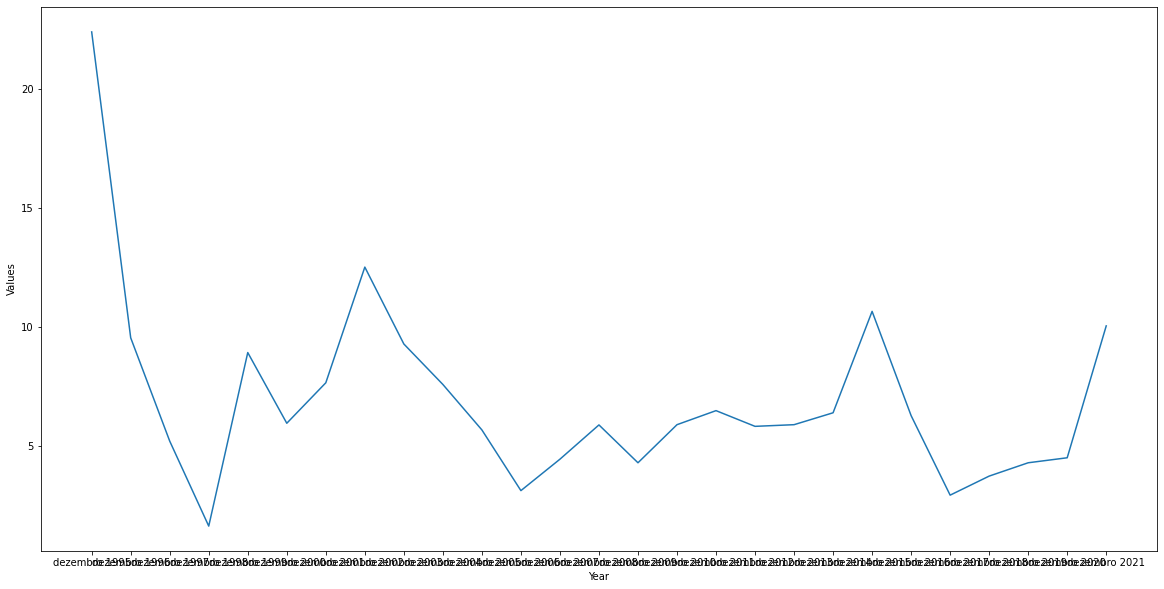

In [173]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=indice_ipca, x="Year", y="Values" , ax = ax)

### FIM